# OBJECTIVE
## My goal is to create a model that can predict if a certain employee will leave the company or not and to know the reasons for their departure

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
#Import Dataset
dataset = pd.read_csv('Downloads/HR.csv') 
X = dataset.iloc[:, [0,1,2,3,4,5,7,9]].values
y = dataset.iloc[:, 6].values
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#Encoding Categorical Data(Salary)
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 7] = labelencoder_X.fit_transform(X[:, 7])

In [4]:
#Spliting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
#Fitting Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0,oob_score=True)
classifier.fit(X_train, y_train)
print(classifier.oob_score_)

0.9914659080807183


In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 ... 1 0 0]


In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

#Scoring Metrics
import sklearn.metrics as metrics
ac = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:",ac)
re = metrics.recall_score(y_test, y_pred, average='weighted')
print("\nRecall:",re)
pr = metrics.precision_score(y_test, y_pred, average='weighted')
print("\nPrecision:",pr)
f1=metrics.f1_score(y_test, y_pred, average='weighted')
print("\nF1 Score:",f1)

Confusion Matrix:
 [[2872    9]
 [  22  847]]

Accuracy: 0.9917333333333334

Recall: 0.9917333333333334

Precision: 0.991723238110001

F1 Score: 0.9917114880481838


In [8]:
#Predictions
a = float(input("Satisfaction_level:"))
b = float(input("Evaluation:"))
c = int(input("No_of_projects:"))
d = int(input("Average_monthly_hours:"))
e = int(input("TimeSpentInCompany:"))
f = int(input("WorkAccident:"))
g = int(input("Promotion:"))
h = int(input("Salary(High->1,Low->0,Medium->2:"))
    
y1 = np.column_stack([[a],[b],[c],[d],[e],[f],[g],[h]])

ypredself = classifier.predict(y1)
print(ypredself)

Satisfaction_level:0.1
Evaluation:0.5
No_of_projects:5
Average_monthly_hours:350
TimeSpentInCompany:3
WorkAccident:1
Promotion:0
Salary(High->1,Low->0,Medium->2:2
[1]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


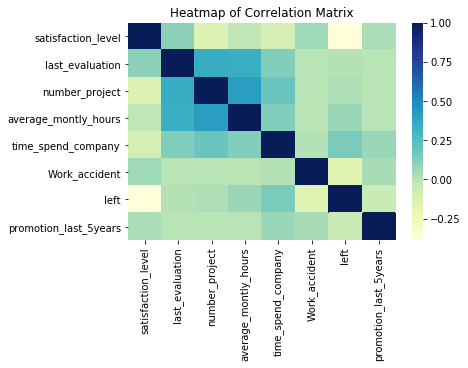

In [9]:
#Correlation Matrix
corr = dataset.corr()
corr = (corr)
ax = plt.axes()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, ax=ax, cmap="YlGnBu")
ax.set_title('Heatmap of Correlation Matrix')
corr

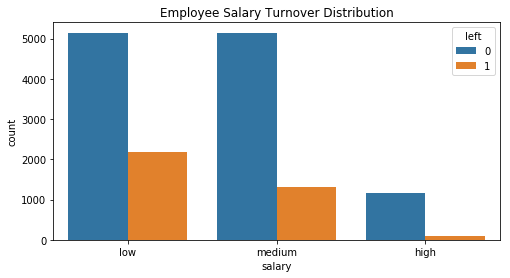

In [10]:
#Turnover vs Salary
ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="salary", hue='left', data=dataset).set_title('Employee Salary Turnover Distribution');

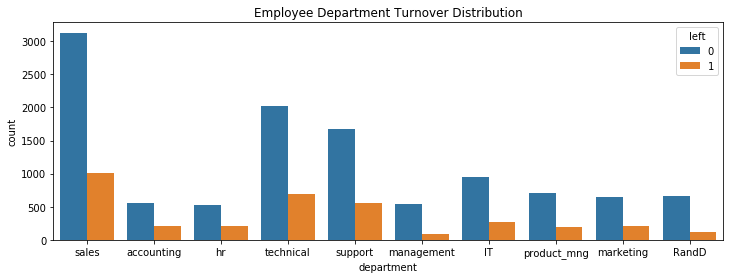

In [11]:
#Turnover vs Department
ax = plt.subplots(figsize=(12, 4))
sns.countplot(x="department", hue='left', data=dataset).set_title('Employee Department Turnover Distribution');

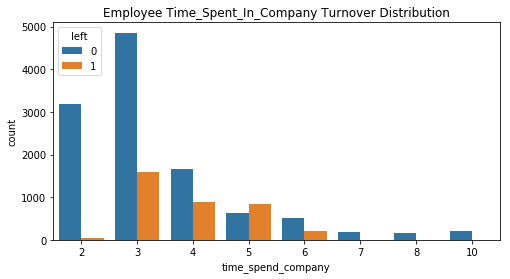

In [12]:
#Turnover vs Time_Spent_In_Company
ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="time_spend_company", hue='left', data=dataset).set_title('Employee Time_Spent_In_Company Turnover Distribution');

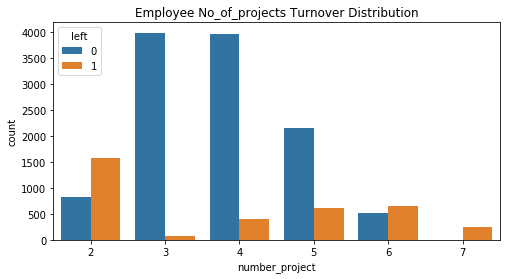

In [13]:
#Turnover vs No_of_projects
ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="number_project", hue='left', data=dataset).set_title('Employee No_of_projects Turnover Distribution');

Text(0.5,1,'Employee Evaluation Distribution - Turnover V.S. No Turnover')

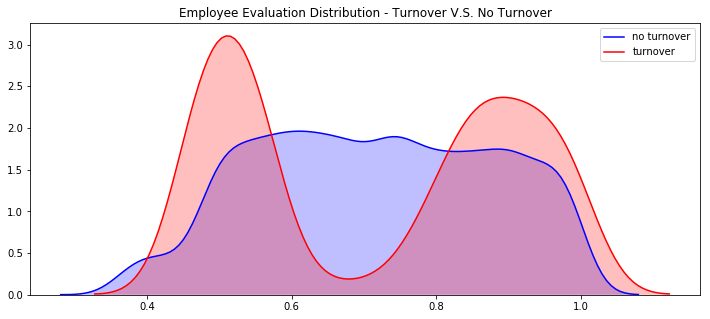

In [14]:
#Employee Evaluation Distribution - Turnover V.S. No Turnover
fig = plt.figure(figsize=(12,5),)
ax=sns.kdeplot(dataset.loc[(dataset['left'] == 0),'last_evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(dataset.loc[(dataset['left'] == 1),'last_evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Text(0.5,1,'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

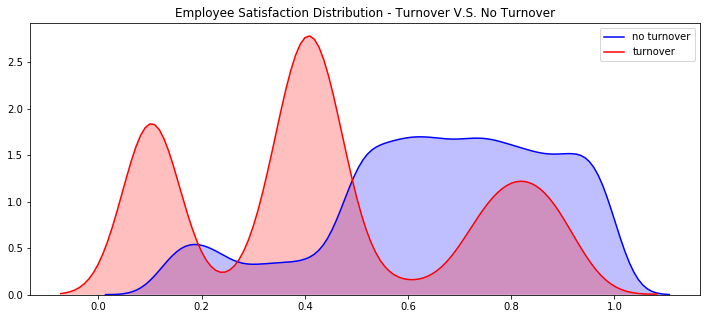

In [15]:
#Employee Satisfaction Distribution - Turnover V.S. No Turnover
fig = plt.figure(figsize=(12,5),)
ax=sns.kdeplot(dataset.loc[(dataset['left'] == 0),'satisfaction_level'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(dataset.loc[(dataset['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

Text(0.5,1,'Employee Avg Monyhly hours Distribution - Turnover V.S. No Turnover')

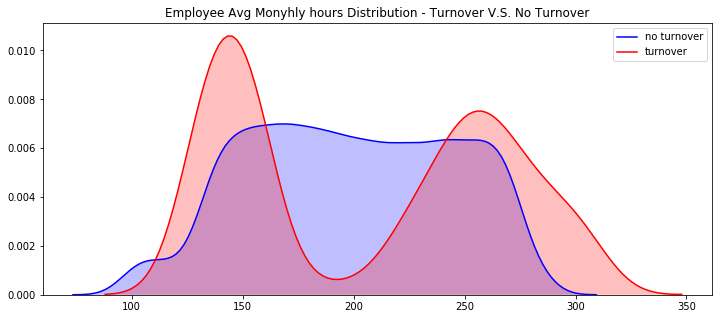

In [16]:
#Employee Avg_monthly_hours Distribution - Turnover V.S. No Turnover
fig = plt.figure(figsize=(12,5),)
ax=sns.kdeplot(dataset.loc[(dataset['left'] == 0),'average_montly_hours'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(dataset.loc[(dataset['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='turnover')
plt.title('Employee Avg Monyhly hours Distribution - Turnover V.S. No Turnover')

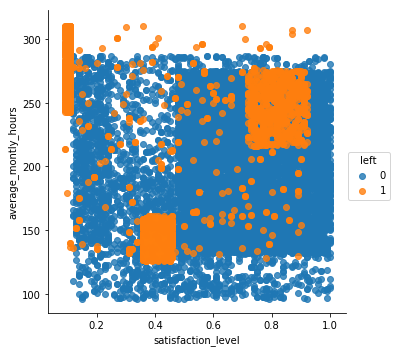

In [17]:
#Avg monthly hrs Vs Satisfaction
sns.lmplot(x='satisfaction_level', y='average_montly_hours', data=dataset,fit_reg=False,hue='left')

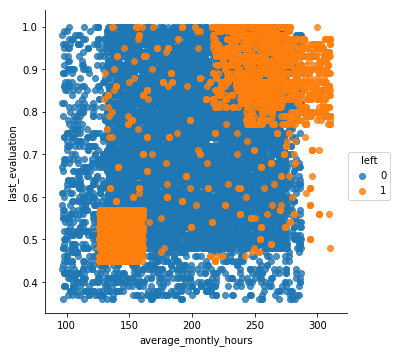

In [18]:
#Evaluation Vs Avg monthly hours
sns.lmplot(x='average_montly_hours', y='last_evaluation', data=dataset,fit_reg=False,hue='left')

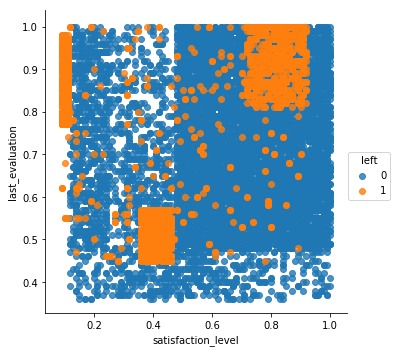

In [19]:
#Evaluation Vs Satisfaction
sns.lmplot(x='satisfaction_level', y='last_evaluation', data=dataset,fit_reg=False,hue='left')

In [20]:
# CONCLUSION

#Employees generally left when they are underworked (less than 150hr/month or 6hr/day)
#Employees generally left when they are overworked (more than 250hr/month or 10hr/day)
#Employees with either really high or low evaluations should be taken into consideration for high turnover rate
#Employees with low to medium salaries are the bulk of employee turnover
#Employees that had very less or very high project count was at risk of leaving the company
#Employee satisfaction is the highest indicator for employee turnover
#Employees with 4 and 5 years at a company are endangered of leaving